In [2]:
import sys

import seaborn as sns
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import inspect
import os
import re
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
ls                            

538_pollster_ratings.ipynb  data/
README.md                   special_elections/
Untitled.ipynb


In [4]:
ls data

538_approval_polllist.csv    pollster-ratings_528csv.csv
538_approval_topline.csv     raw-polls_528.csv
dkos 18.csv                  special-elections_538.csv
pollster-ratings.csv


In [5]:
dfile = 'data/pollster-ratings.csv'

In [6]:
df = pd.read_csv(dfile, )

In [7]:
df.head()

,Pollster,# of Polls,NCPP / AAPOR / Roper,Exclusively Live Caller With Cellphones,Methodology,Banned by 538,Historical Advanced Plus-Minus,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,Misses Outside MOE,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus Minus,Predictive Plus-Minus,# of Polls for Bias Analysis,Bias,Mean-Reverted Bias.1,House Effect
0,Selzer & Co.,43,yes,yes,Live,no,-1.9,-1.4,A+,R +0.0,86%,21%,4.2,5.6,-1.4,-1.9,-1.1,-1.4,30,R +0.0,R +0.0,D +0.1
1,Monmouth University,95,yes,yes,Live,no,-1.5,-1.3,A+,D +1.4,80%,17%,5.3,6.2,-0.8,-1.5,-1.1,-1.3,65,D +2.1,D +1.4,R +0.7
2,Field Research Corp. (Field Poll),25,yes,yes,Live,no,-2.5,-1.1,A+,R +1.2,100%,16%,3.9,5.7,-1.8,-2.5,-1.1,-1.1,18,R +3.3,R +1.2,D +0.6
3,ABC News/Washington Post,60,yes,yes,Live,no,-1.3,-1.1,A+,D +0.6,78%,5%,2.9,4.6,-1.8,-1.3,-0.9,-1.1,55,D +0.9,D +0.6,D +1.5
4,Elway Research,21,yes,yes,Live,no,-2.2,-1.1,A+,D +0.5,90%,5%,3.9,5.9,-1.9,-2.2,-0.9,-1.1,20,D +1.2,D +0.5,D +3.2


In [8]:
df.dtypes

Pollster                                    object
# of Polls                                   int64
NCPP / AAPOR / Roper                        object
Exclusively Live Caller With Cellphones     object
Methodology                                 object
Banned by 538                               object
Historical Advanced Plus-Minus             float64
Predictive    Plus-Minus                   float64
538 Grade                                   object
Mean-Reverted Bias                          object
Races Called Correctly                      object
Misses Outside MOE                          object
Simple Average Error                       float64
Simple Expected Error                      float64
Simple Plus-Minus                          float64
Advanced Plus-Minus                        float64
Mean-Reverted Advanced Plus Minus          float64
Predictive Plus-Minus                      float64
# of Polls for Bias Analysis                 int64
Bias                           

In [9]:
binarycols=['NCPP / AAPOR / Roper','Exclusively Live Caller With Cellphones','Banned by 538']
for y in binarycols:
    print(y)
    df[y] = df[y].apply(lambda x: 1 if x == 'yes' else ( 0 if x=='no' else np.nan))

NCPP / AAPOR / Roper
Exclusively Live Caller With Cellphones
Banned by 538


In [10]:
df.head()

,Pollster,# of Polls,NCPP / AAPOR / Roper,Exclusively Live Caller With Cellphones,Methodology,Banned by 538,Historical Advanced Plus-Minus,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,Misses Outside MOE,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus Minus,Predictive Plus-Minus,# of Polls for Bias Analysis,Bias,Mean-Reverted Bias.1,House Effect
0,Selzer & Co.,43,1,1,Live,0,-1.9,-1.4,A+,R +0.0,86%,21%,4.2,5.6,-1.4,-1.9,-1.1,-1.4,30,R +0.0,R +0.0,D +0.1
1,Monmouth University,95,1,1,Live,0,-1.5,-1.3,A+,D +1.4,80%,17%,5.3,6.2,-0.8,-1.5,-1.1,-1.3,65,D +2.1,D +1.4,R +0.7
2,Field Research Corp. (Field Poll),25,1,1,Live,0,-2.5,-1.1,A+,R +1.2,100%,16%,3.9,5.7,-1.8,-2.5,-1.1,-1.1,18,R +3.3,R +1.2,D +0.6
3,ABC News/Washington Post,60,1,1,Live,0,-1.3,-1.1,A+,D +0.6,78%,5%,2.9,4.6,-1.8,-1.3,-0.9,-1.1,55,D +0.9,D +0.6,D +1.5
4,Elway Research,21,1,1,Live,0,-2.2,-1.1,A+,D +0.5,90%,5%,3.9,5.9,-1.9,-2.2,-0.9,-1.1,20,D +1.2,D +0.5,D +3.2


In [11]:
df.shape

(396, 22)

In [12]:
df.columns

Index(['Pollster', '# of Polls', 'NCPP / AAPOR / Roper',
       'Exclusively Live Caller With Cellphones', 'Methodology',
       'Banned by 538', 'Historical Advanced Plus-Minus',
       'Predictive    Plus-Minus', '538 Grade', 'Mean-Reverted Bias',
       'Races Called Correctly', 'Misses Outside MOE', 'Simple Average Error',
       'Simple Expected Error', 'Simple Plus-Minus', 'Advanced Plus-Minus',
       'Mean-Reverted Advanced Plus Minus', 'Predictive Plus-Minus',
       '# of Polls for Bias Analysis', 'Bias', 'Mean-Reverted Bias.1',
       'House Effect'],
      dtype='object')

In [13]:
df.Methodology.unique()

array(['Live', 'IVR/Online/Live', 'Online', 'IVR', 'Live*', 'IVR/Online',
       'Online/Live', 'IVR/Live', 'Online/Live/Mail', 'Mail'],
      dtype=object)

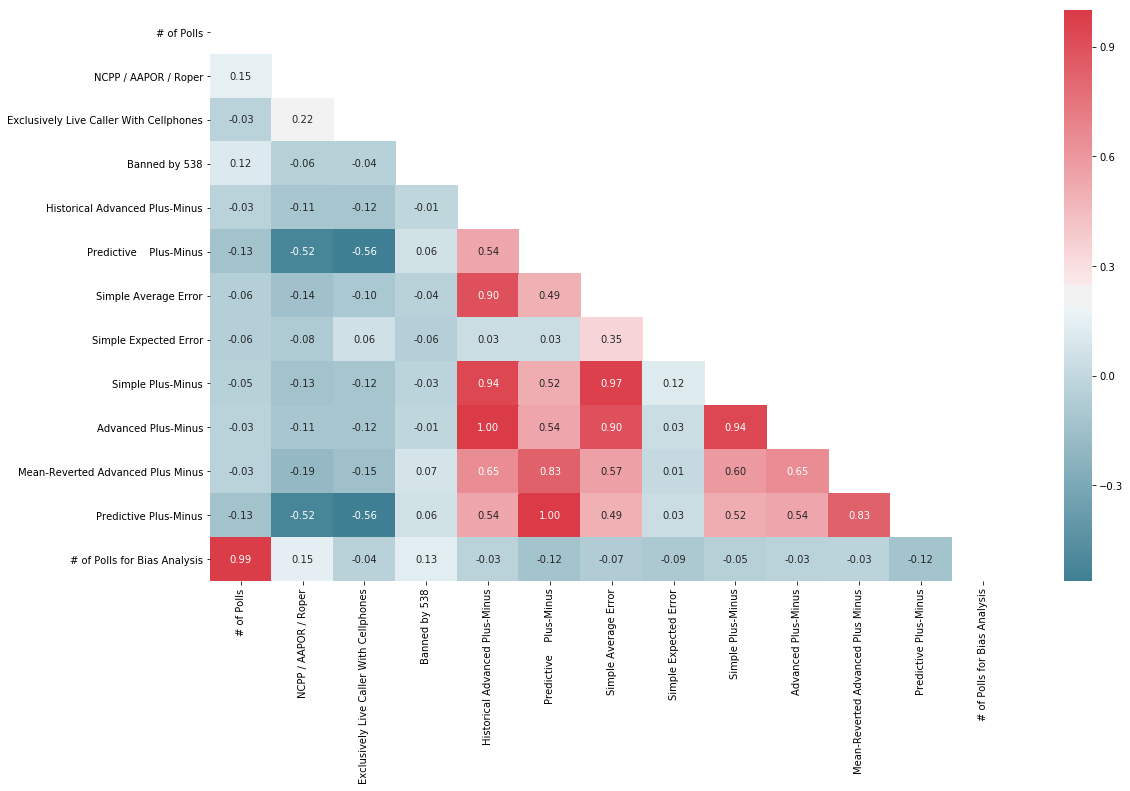

In [14]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
    
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 10, as_cmap=True))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10.5)

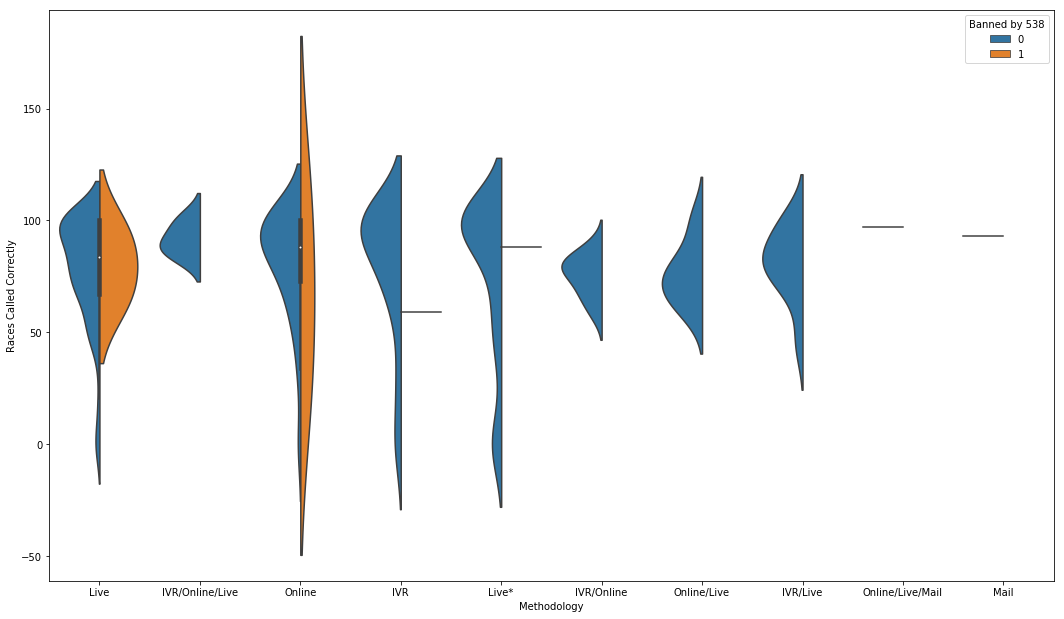

In [42]:
sns.violinplot(x='Methodology', y=df['Races Called Correctly'].astype(int),hue='Banned by 538', data=df, split=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10.5)



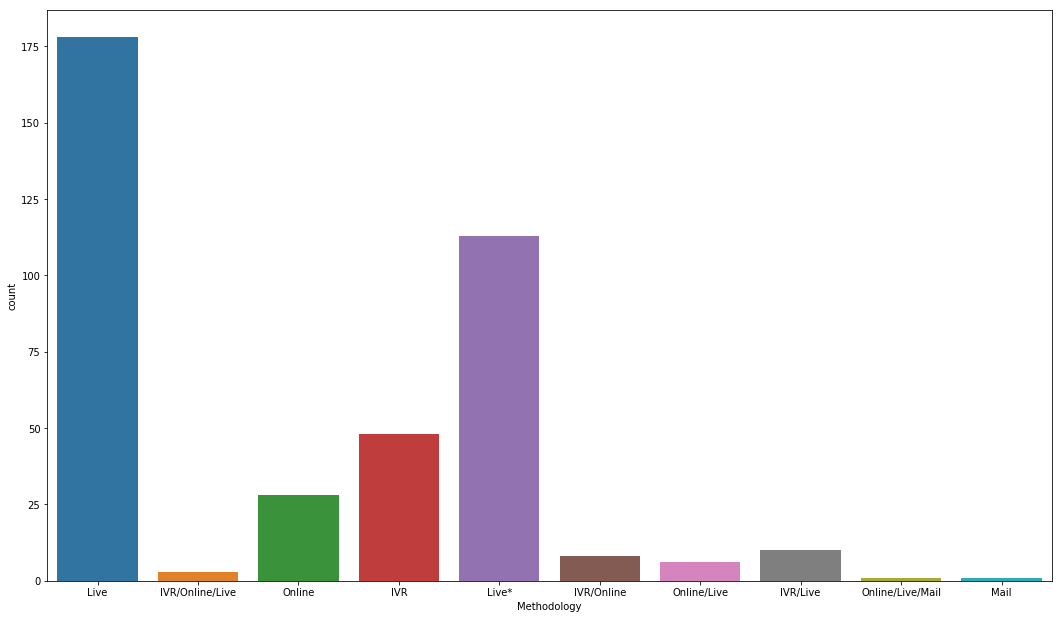

In [30]:
sns.categorical.countplot( x='Methodology', data=df)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10.5)

/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


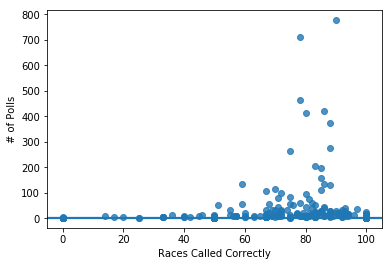

In [41]:
sns.regplot(x=df['Races Called Correctly'].astype(int), y='# of Polls', data=df, logistic=True)

In [37]:
df['Races Called Correctly'] = df['Races Called Correctly'].apply(lambda x:x[:-1])